(54, 54, 4563) (54, 54, 4563)


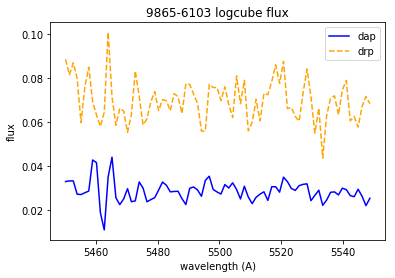

(64, 64, 4563) (64, 64, 4563)


<Figure size 432x288 with 0 Axes>

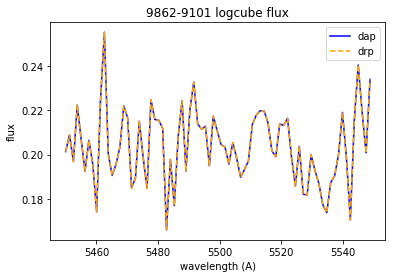

(74, 74, 4563) (74, 74, 4563)


<Figure size 432x288 with 0 Axes>

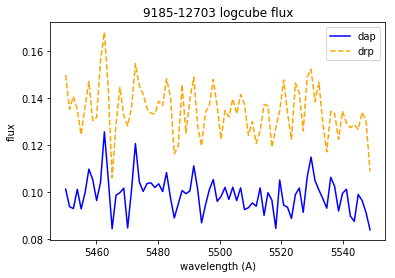

(42, 42, 4563) (42, 42, 4563)


<Figure size 432x288 with 0 Axes>

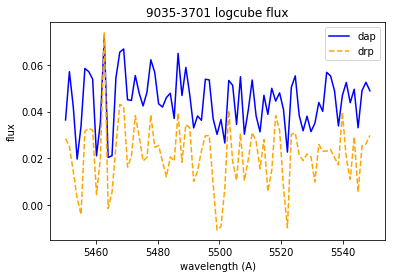

(52, 52, 4563) (52, 52, 4563)


<Figure size 432x288 with 0 Axes>

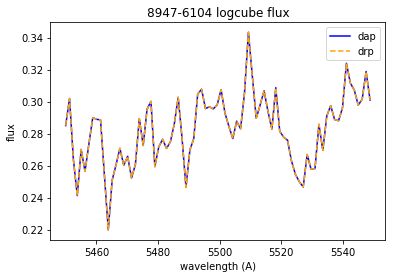

(64, 64, 4563) (64, 64, 4563)


<Figure size 432x288 with 0 Axes>

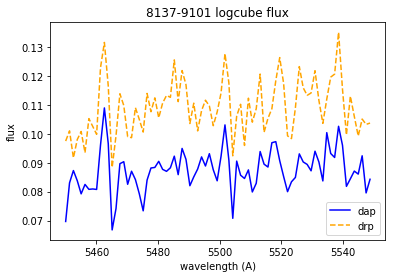

(42, 42, 4563) (42, 42, 4563)


<Figure size 432x288 with 0 Axes>

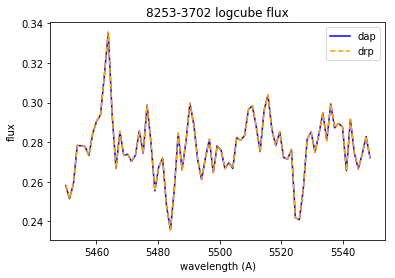

(52, 52, 4563) (52, 52, 4563)


<Figure size 432x288 with 0 Axes>

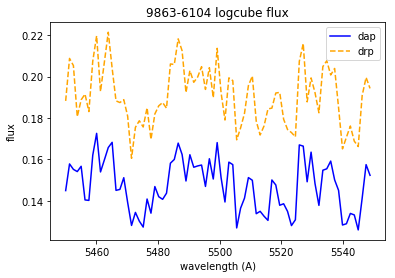

(64, 64, 4563) (64, 64, 4563)


<Figure size 432x288 with 0 Axes>

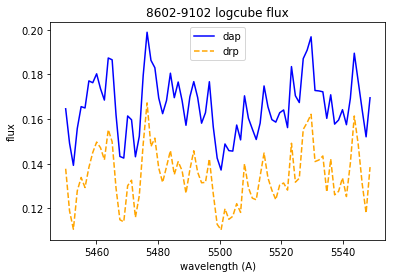

(54, 54, 4563) (54, 54, 4563)


<Figure size 432x288 with 0 Axes>

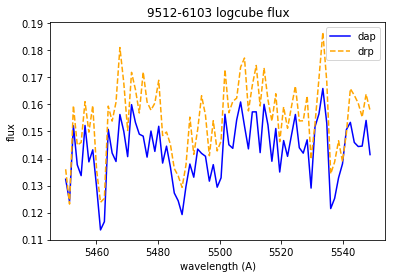

<Figure size 432x288 with 0 Axes>

In [2]:
'''

2019-09-01 12:42:43 
compare flux between dap-hyb10-logcube and drp-logcube

'''

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import random
import os 
import time

##########
dir_com='/Users/astro/Documents/notebooks/zs/2019-08-31/compare_dap_drp_2019_09_01_1255/'
dir_dap='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/HYB10-MILESHC-MILESHC/'
dir_drp='/Users/astro/Documents/notebooks/manga/spectro/redux/v2_5_3/'

def plot(wave_dap,flux_dap,wave_drp,flux_drp,plateifu,timenow,point):
    plt.figure()
    plt.plot(wave_dap,flux_dap,'-',label='dap',color='b')
    plt.plot(wave_drp,flux_drp,'--',label='drp',color='orange')
    plt.legend()
    plt.title(plateifu +' logcube flux')
    plt.xlabel('wavelength (A)')
    plt.ylabel('flux')    
    plt.savefig(dir_com+plateifu+'5450-5550-%s-%s.jpg'%(timenow,point),format='jpg',dpi=300)    
    plt.show()
    plt.clf()
    
if __name__=='__main__':
    #####test
    num1=10
    timenow=time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime())
    point=7
    
    #####
    f_drpall=fits.open(dir_drp+'drpall-v2_5_3.fits')
    data=f_drpall[1].data
    plateifu=data.field('plateifu')
    plateifu=random.choices(plateifu,k=num1)
    
    for i in range(0,num1,1):
        plate=plateifu[i].split('-')[0]
        ifu=plateifu[i].split('-')[1]
        #####dap
        file_dap=dir_dap+plate+'/'+ifu+'/manga-'+plate+'-'+ifu+'-LOGCUBE-HYB10-MILESHC-MILESHC.fits.gz'
        file_drp=dir_drp+plate+'/stack/manga-'+plate+'-'+ifu+'-LOGCUBE.fits.gz'
        if os.path.exists(file_dap) and os.path.exists(file_drp):
            f_dap=fits.open(file_dap)
            flux_dap=np.transpose(f_dap['FLUX'].data,axes=(2,1,0))
            wave_dap=f_dap['WAVE'].data
            dap_header=f_dap['FLUX'].header
            x_center_dap=np.int(dap_header['CRPIX1'])-point
            y_center_dap=np.int(dap_header['CRPIX2'])-point
            flux_dap1=flux_dap[x_center_dap,y_center_dap]
            wave_dap_m=(wave_dap>5550)|(wave_dap<5450)
            flux_dap2=np.ma.array(flux_dap1,mask=wave_dap_m)
            #####drp
            file_drp=dir_drp+plate+'/stack/manga-'+plate+'-'+ifu+'-LOGCUBE.fits.gz'
            f_drp=fits.open(file_drp)
            flux_drp=np.transpose(f_drp['FLUX'].data,axes=(2,1,0))
            wave_drp=f_drp['WAVE'].data
            drp_header=f_drp['FLUX'].header
            x_center_drp=np.int(drp_header['CRPIX1'])-point
            y_center_drp=np.int(drp_header['CRPIX2'])-point
            flux_drp1=flux_drp[x_center_drp,y_center_drp]
            wave_drp_m=(wave_drp>5550)|(wave_drp<5450)
            flux_drp2=np.ma.array(flux_drp1,mask=wave_drp_m)
            
            print(flux_dap.shape,flux_drp.shape)
            plot(wave_dap,flux_dap2,wave_drp,flux_drp2,plateifu[i],timenow,point)
        
        

    
    

In [5]:
plateifu

['8315-1901',
 '8997-6101',
 '8312-6102',
 '9045-1902',
 '9034-12702',
 '8077-6104',
 '10144-6103',
 '9489-9101',
 '9503-3702',
 '9045-1902']

5500A附近没有发射线,所以可以来看连续谱;
信号强的时候,drp和dap的Logcube差别不大,但是信号弱的时候就有差别了;
